In [17]:
def count_metrics(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()


    vertices = set()
    edges = set()
    arcs = set()
    required_vertices = set()
    required_edges = set()
    required_arcs = set()
    section = None

    for line in lines:
        line = line.strip()

        if line.startswith("ReN."):
            section = "ReN"
            continue
        elif line.startswith("ReE."):
            section = "ReE"
            continue
        elif line.startswith("EDGE"):
            section = "EDGE"
            continue
        elif line.startswith("ReA."):
            section = "ReA"
            continue
        elif line.startswith("ARC"):
            section = "ARC"
            continue

        if line and section:
            parts = line.split("\t")

            if section == "ReN":
                try:
                    node = int(parts[0].replace("N", ""))
                    demand = int(parts[1])
                    s_cost = int(parts[2])
                    aux = (node, (demand, s_cost))
                    required_vertices.add(aux) 
                    vertices.add(node)  
                except ValueError:
                    continue  

            elif section in ["ReE", "EDGE"]:
                try:
                    u, v = int(parts[1]), int(parts[2]) 
                    vertices.update([u, v]) #vertices q nao estavam em ReN
                    edge = (min(u, v), max(u, v)) 

                    t_cost = int(parts[3]) 

                    edges.add((edge, (t_cost))) 

                    if section == "ReE":
                        demand = int(parts[4]) 
                        s_cost = int(parts[5]) 
                        required_edges.add((edge, (t_cost, demand, s_cost)))
                except ValueError:
                    continue

            elif section in ["ReA", "ARC"]:
                try:
                    u, v = int(parts[1]), int(parts[2])
                    vertices.update([u, v]) #vertices q nao estavam em ReN
                    arc = (u, v)
                    t_cost = int(parts[3]) 

                    arcs.add((arc, (t_cost)))
                    if section == "ReA":
                        demand = int(parts[4]) 
                        s_cost = int(parts[5]) 
                        required_arcs.add((arc, (t_cost, demand, s_cost)))
                except ValueError:
                    continue

    return vertices, edges, arcs, required_vertices, required_edges, required_arcs


def calcula_graus(vertices, edges, arcs):
    graus = {}
    
    for v in vertices:
        graus[v] = [0, 0, 0]
        #[grau, grau de entrada, grau de saída]
       
    for (u, v), _ in edges:
        graus[u][0] += 1
        graus[v][0] += 1
    
    for (u, v), _ in arcs:
        graus[v][1] += 1  #grau entrada
        graus[u][2] += 1  #grau saida
        
    
    graus_set = tuple((v, tuple(degrees)) for v, degrees in graus.items())
    
    return graus_set

def dijkstra(start_node, edges, arcs, end_node=None):
    distancias = {start_node: 0} 
    predecessores = {start_node: None}
    nos_visitados = set()
    fila_prioridade = {start_node: 0}
    
    while fila_prioridade:
        node = min(fila_prioridade, key=fila_prioridade.get)
        fila_prioridade.pop(node)
        nos_visitados.add(node)

        for (u, v), (t_cost) in edges:
            if u == node and v not in nos_visitados:
                nova_distancia = distancias[u] + t_cost
                if v not in distancias or nova_distancia < distancias[v]:
                    distancias[v] = nova_distancia
                    predecessores[v] = u
                    fila_prioridade[v] = nova_distancia
                    
            if v == node and u not in nos_visitados:
                nova_distancia = distancias[v] + t_cost
                if u not in distancias or nova_distancia < distancias[u]:
                    distancias[u] = nova_distancia
                    predecessores[u] = v
                    fila_prioridade[u] = nova_distancia
        

        for (u, v), (t_cost) in arcs:
            if u == node and v not in nos_visitados:
                nova_distancia = distancias[u] + t_cost
                if v not in distancias or nova_distancia < distancias[v]:
                    distancias[v] = nova_distancia
                    predecessores[v] = u
                    fila_prioridade[v] = nova_distancia
                    

    distancias_ordenadas = {key: distancias[key] for key in sorted(distancias)}

    if end_node is not None:
        caminho = []
        current_node = end_node
  
        while current_node != start_node:
            caminho.append(current_node)
            current_node = predecessores.get(current_node)
        
        caminho.append(start_node)
        caminho.reverse()
        return distancias_ordenadas, tuple(caminho)

    #talvez eu tenha que retornar tbm os predecessores, mas nao sei ainda
    return distancias_ordenadas




file_path = "teste.dat" 
vertices, edges, arcs, required_vertices, required_edges, required_arcs = count_metrics(file_path)
graus = calcula_graus(vertices, edges, arcs)

start_node = list(vertices)[0]
last_node = list(vertices)[1]
distancias, caminho = dijkstra(start_node, edges, arcs, last_node)
# print(f" vértices: {(vertices)}")
# print(f"Quantidade de arestas: {len(edges)}")
# print(f"Quantidade de arcos: {len(arcs)}")
# print(f"Quantidade de vértices requeridos: {len(required_vertices)}")
# print(f"Quantidade de arestas requeridas: {len(required_edges)}")
# print(f"Quantidade de arcos requeridos: {len(required_arcs)}")
print (distancias)
print (caminho)

#TODO
# 1. Quantidade de vértices; OK
# 2. Quantidade de arestas; OK
# 3. Quantidade de arcos; OK
# 4. Quantidade de vértices requeridos; OK
# 5. Quantidade de arestas requeridas; OK
# 6. Quantidade de arcos requeridos; OK
# 7. Densidade do grafo (order strength);
# 8. Componentes conectados;
# 9. Grau mínimo dos vértices; OK?
# 10. Grau máximo dos vértices; OK?
# 11. Intermediação - Mede a frequência com que um nó aparece nos caminhos mais curtos;
# 12. Caminho médio;
# 13. Diâmetro;
#
# Importante: Muitas dessas métricas utilizam os resultados da matriz de caminhos mais curtos de múltiplas fontes.
# Assim, como um dos produtos da Etapa 1, é necessário desenvolver o algoritmo que gera tal matriz,
# assim como a matriz de predecessores.

{1: 0, 2: 9, 3: 5, 38: 3}
(1, 3, 2)


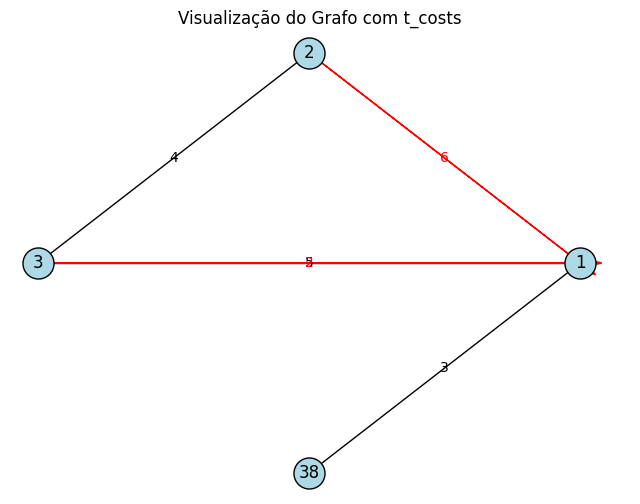

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph_manual_with_costs(vertices, edges, arcs):
    plt.figure(figsize=(8, 6))
    
    # Gera posições para os nós usando um círculo
    num_nodes = len(vertices)
    angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
    node_positions = {v: (np.cos(angle), np.sin(angle)) for v, angle in zip(vertices, angles)}

    # Desenha os nós
    for v, (x, y) in node_positions.items():
        plt.scatter(x, y, s=500, color='lightblue', edgecolors='black', zorder=3)
        plt.text(x, y, str(v), fontsize=12, ha='center', va='center', zorder=4)

    # Desenha as arestas (não direcionadas) e imprime t_cost
    for (u, v), (t_cost) in edges:
        x_vals, y_vals = zip(node_positions[u], node_positions[v])
        plt.plot(x_vals, y_vals, 'k-', lw=1, zorder=2)  # Preto para arestas
        # Posiciona o texto no meio da aresta
        mx, my = (x_vals[0] + x_vals[1]) / 2, (y_vals[0] + y_vals[1]) / 2
        plt.text(mx, my, str(t_cost), fontsize=10, ha='center', va='center', color='black', zorder=5)

    # Desenha os arcos (direcionados) e imprime t_cost
    for (u, v), (t_cost) in arcs:
        x_vals, y_vals = zip(node_positions[u], node_positions[v])
        plt.arrow(x_vals[0], y_vals[0], x_vals[1] - x_vals[0], y_vals[1] - y_vals[0],
                  head_width=0.05, head_length=0.08, fc='red', ec='red', lw=1, zorder=2)  # Vermelho para arcos
        # Posiciona o texto no meio do arco
        mx, my = (x_vals[0] + x_vals[1]) / 2, (y_vals[0] + y_vals[1]) / 2
        plt.text(mx, my, str(t_cost), fontsize=10, ha='center', va='center', color='red', zorder=5)
    
    plt.axis('off')
    plt.title("Visualização do Grafo com t_costs")
    plt.show()

# Chame a função após extrair os dados
plot_graph_manual_with_costs(vertices, edges, arcs)
